In [1]:
using PyPlot
using FastGaussQuadrature32

INFO: Loading help data...


In [24]:
@time nodes, weights = gausslegendre( 100000 )

elapsed time: 0.023642896 seconds (8801320 bytes allocated)


([-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0  …  1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],[7.42069e-10,1.72739e-9,2.71418e-9,3.70109e-9,4.68803e-9,5.67497e-9,6.66192e-9,7.64887e-9,8.63582e-9,9.62277e-9  …  9.62277e-9,8.63582e-9,7.64887e-9,6.66192e-9,5.67497e-9,4.68803e-9,3.70109e-9,2.71418e-9,1.72739e-9,7.42069e-10])

In [20]:
function squared(x)
    x.*x
end

squared (generic function with 1 method)

In [23]:
@time sum(weights .* squared(nodes))

elapsed time: 0.002469826 seconds (1600632 bytes allocated)


0.6666666666666666

In [41]:
log(-1.0 + 0im)

0.0 + 3.141592653589793im

In [29]:
@time sum(weights .* (nodes.^2))

elapsed time: 0.009797319 seconds (1600424 bytes allocated)


0.6666666666666666

In [91]:
function christoffel_integrand(prevertices, angles)
    function fprime(z :: Complex{Float64})
        prod((z - prevertices).^(-angles))
    end
end

christoffel_integrand (generic function with 1 method)

In [92]:
intgnd = christoffel_integrand([-2.0+0.0im -1.0+0.0im 1.0+0.0im 2.0+0.0im],[0.5, 0.5, 0.5, 0.5])

fprime (generic function with 1 method)

In [93]:
@time intgnd(rand()+rand()im)

elapsed time: 0.005724221 seconds (27396 bytes allocated)


0.06946765253311873 + 0.09079663421802275im

In [94]:
function christoffel_integral(z, prevertices, angles, n)
    nodes, weights = gausslegendre(n)
    integrand = christoffel_integrand(prevertices, angles)
    z/2.0 * sum(weights .* [ integrand( z/2.0 .* node + z/2.0) for node in nodes])
end

christoffel_integral (generic function with 1 method)

In [95]:
@time christoffel_integral(rand()+rand()im, [-2.0+0.0im -1.0+0.0im 1.0+0.0im 2.0+0.0im],[0.5, 0.5, 0.5, 0.5],10)

elapsed time: 0.018464062 seconds (213480 bytes allocated)


0.05600233100343156 + 0.17210840984762418im

In [105]:
Z = linspace(-10,10,100) * ones(100)' + ones(100) * linspace(0.1,10,100)'*1.0im;

In [110]:
W = [ christoffel_integral(z, [-4.0+0.0im -1.0+0.0im 1.0+0.0im 4.0+0.0im],[0.5, 0.5, 0.5, 0.5], 10) for z in Z];

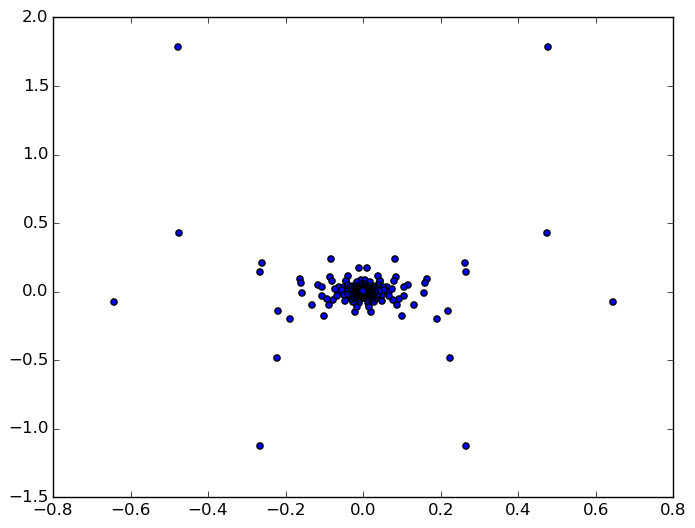

PyObject <matplotlib.collections.PathCollection object at 0xaa08ae0c>

In [111]:
scatter(real(W), imag(W))

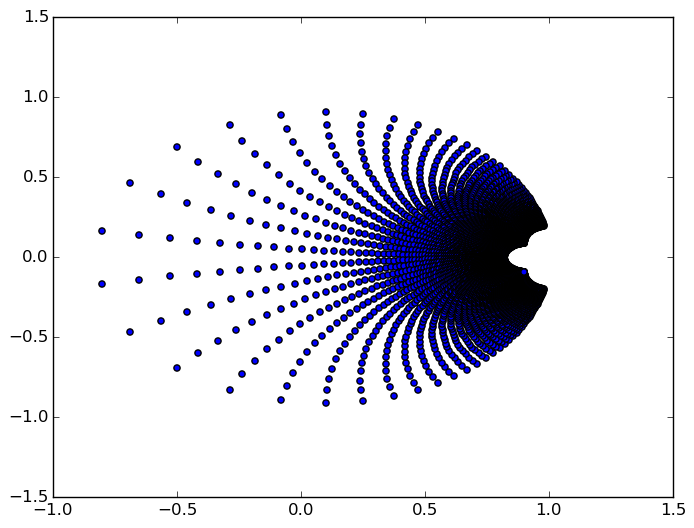

PyObject <matplotlib.collections.PathCollection object at 0xa916ab4c>

In [114]:
scatter(real((Z - 1.0im)./(Z + 1.0im)), imag((Z - 1.0im)./(Z + 1.0im)))

In [124]:
M = [ [christoffel_integral(m + 0im, [-2.0+0.0im -1.0+0.0im 1.0+0.0im 2.0+0.0im],[0.5, 0.5, 0.5, 0.5],10) for m in linspace(-0.9,0.9)]
    [christoffel_integral(m*1.0im, [-2.0+0.0im -1.0+0.0im 1.0+0.0im 2.0+0.0im],[0.5, 0.5, 0.5, 0.5],10) for m in linspace(0,100,1000)] ];

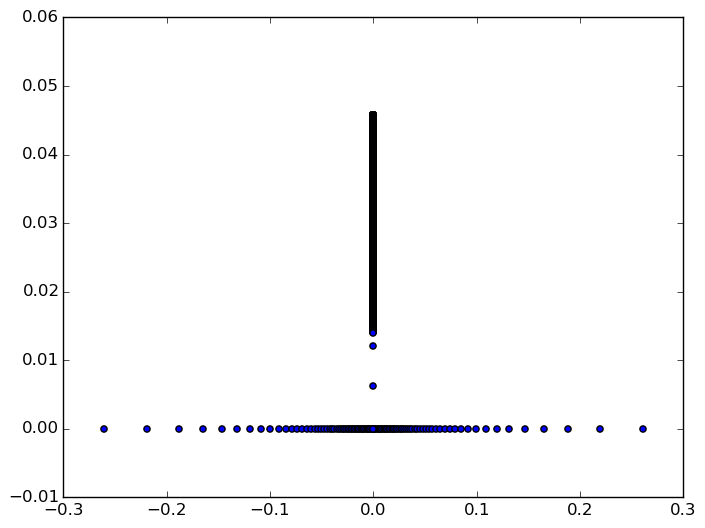

PyObject <matplotlib.collections.PathCollection object at 0xa8b9dbec>

In [125]:
scatter(real(M), imag(M))